This notebook builds on the `2020-07-06 Single neuron sim` notebook.

There, we used an ad-hoc solution to stimulate the simulated neuron  
(namely, directly give I as input, where I is a spike train convolved with a manually
defined EPSC).

Here, we use proper synaptic conductances.


In [38]:
%run init.ipynb

Imported np, mpl, plt
From unyt, imported ms, mV, mS, ..
Imported code package (voltage_to_wiring_sim) as `v`


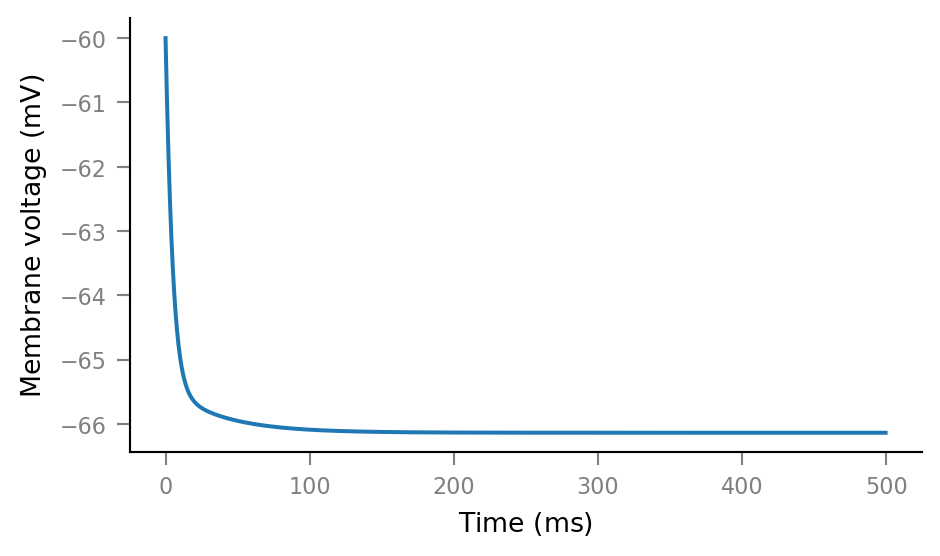

In [45]:
v.neuron_sim.test()

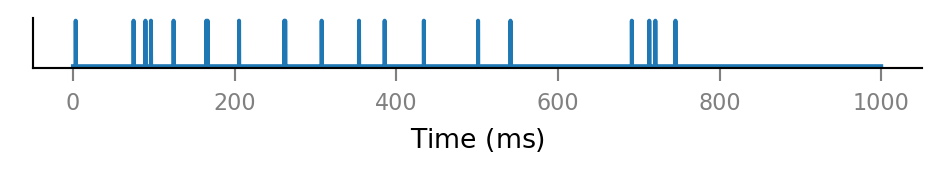

In [12]:
v.presynaptic_spike_train.show()

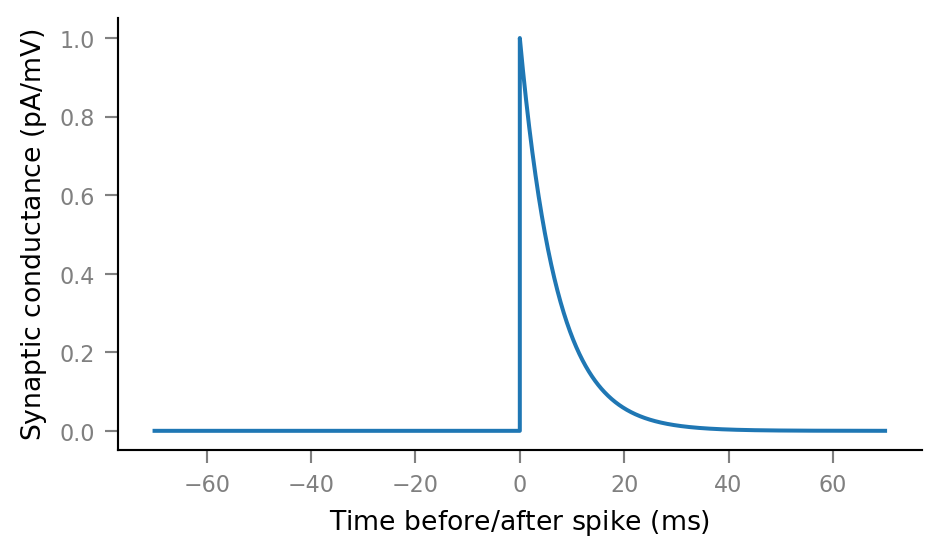

In [39]:
g_syn_tau = 7 * ms
g_syn_max = 1 * nS

time_grid = v.time_grid.time_grid
T_support = 10*g_syn_tau
N_support = round(T_support/time_grid.dt)
t_support = np.linspace(0, T_support, N_support)

g_syn = unyt_array(np.concatenate([
    np.zeros(N_support),
    np.exp(-t_support/g_syn_tau) * g_syn_max
]), nS, name="Synaptic conductance")

t_plot = unyt_array(np.concatenate([-t_support[::-1], t_support]), ms, name="Time before/after spike")
plt.plot(t_plot, g_syn);

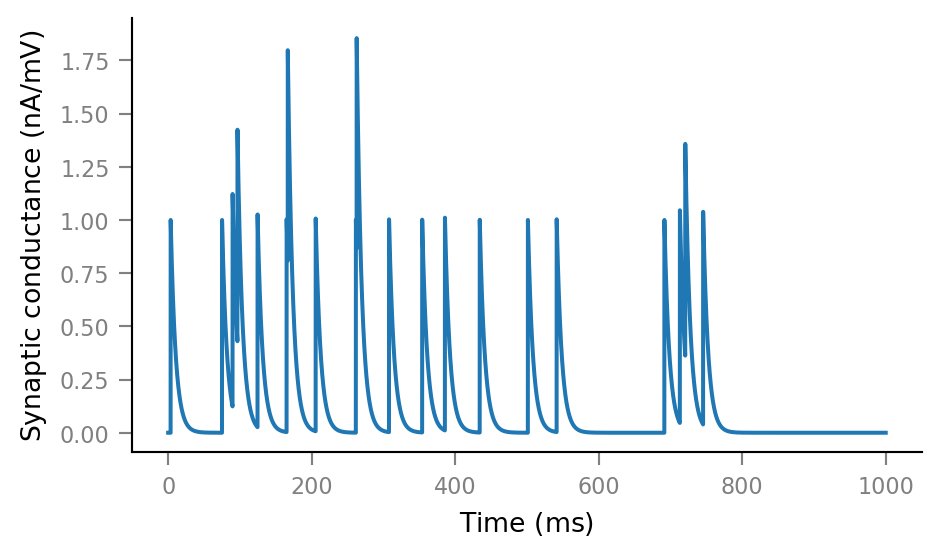

In [40]:
g_syn_total = unyt_array(np.convolve(v.presynaptic_spike_train.all_spikes, g_syn, mode='same'),
                         mS, name="Synaptic conductance")
plt.plot(time_grid.t, g_syn_total);

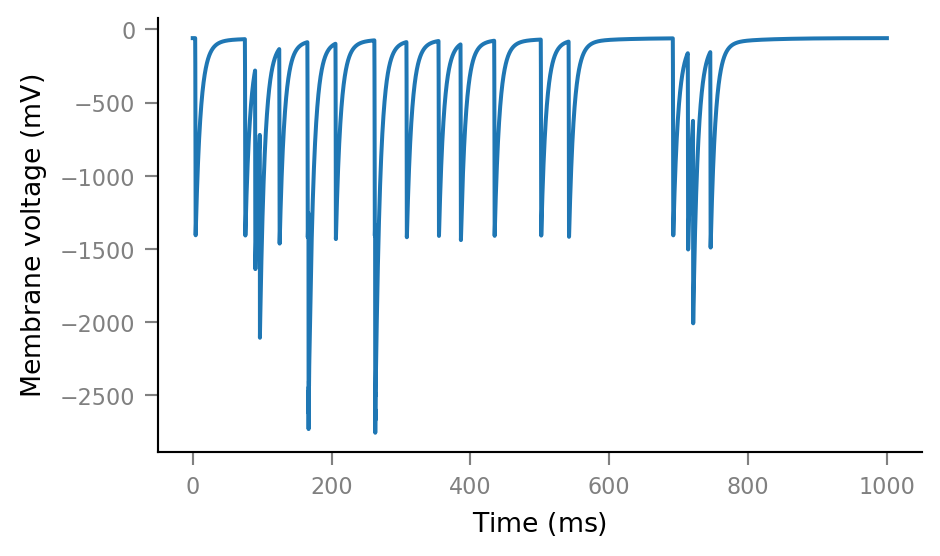

In [43]:
zero_electrode_current = np.zeros(time_grid.N)
sim = v.neuron_sim.izh_neuron(g_syn_total, zero_electrode_current, time_grid, **v.cortical_RS_neuron.izh_params)
plt.plot(time_grid.t, sim.V_m);